In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ringdown.qnms
import qnm
import lal
from collections import namedtuple
import math
from ringdown import simulated_template

In [2]:
T_MSUN = lal.MSUN_SI * lal.G_SI / lal.C_SI**3

In [3]:
#print(sim_temp) # this prints H1 and L1 data left column / time series right column strain

In [50]:
def mode_overtone_waveform(l,m,n):
    ftaulmn = ringdown.qnms.get_ftau(62,0.67,n,l,m) #use qnms function to get freq & tau (damping time)
    # ive set spin to 0.7 seeing that this is spin post merge (perturbed spacetime)
    print('l,m,n mode frequency:',(ftaulmn[0]))
    print('l,m,n mode damping time:',(ftaulmn[1]))
    freq=[ftaulmn[0]]
    tau=[ftaulmn[1]]
    smprate=8048
    duration=0.045
    theta=[0]
    phi=[0]
    amplitude=[10]
    ra=0.705
    dec=1.558
    ifos=['H1','L1']
    tgps=0
    ellip=[1]
    sim_temp = simulated_template(freq, tau, smprate, duration, theta, phi, amplitude, ra, dec, ifos, tgps, ellip, psi=0)
    a = sim_temp[0]['H1']
    #print(a.shape)
    #print(a)
    b = sim_temp[0]['L1']
    b_new = b*(-1)
    #print(b.shape)
    #print(b)
    plt.figure(figsize=(10,4))
    plt.plot(a,label='H1')
    plt.plot(b_new,label='L1')
    plt.xlabel('Time (s)',fontsize=30)
    plt.ylabel('Strain',fontsize=30)
    plt.tick_params(labelsize=20)
    plt.legend(fontsize=20)

l,m,n mode frequency: 270.9329129239895
l,m,n mode damping time: 0.0037311952506700486


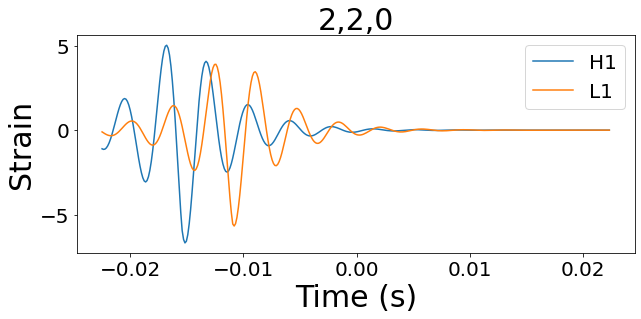

In [51]:
mode_overtone_waveform(2,2,0)
plt.title('2,2,0',fontsize=30)
plt.savefig('simulated_template_waveform',bbox_inches='tight')

In [34]:
def two_overtone_waveforms(overtone1,overtone2,l,m): # this only uses H1 data
    
    ftau220 = ringdown.qnms.get_ftau(62,0.67,overtone1,l,m) #use qnms function to get freq & tau (damping time)
    ftau221 = ringdown.qnms.get_ftau(62,0.67,overtone2,l,m)
# used all previous sim temp inputs bc im lazy but could make general by adding these to args so use can try diff args
    freq=[ftau220[0]]
    tau=[ftau220[1]]
    freq1=[ftau221[0]]
    tau1=[ftau221[1]]
    smprate=8048
    duration=0.045
    theta=[0]
    phi=[0]
    amplitude=[10]
    ra=0.705
    dec=1.558
    ifos=['H1','L1']
    tgps=0
    ellip=[1]
    sim_temp = simulated_template(freq, tau, smprate, duration, theta, phi, amplitude, ra, dec, ifos, tgps, ellip, psi=0)
    sim_temp1 = simulated_template(freq1, tau1, smprate, duration, theta, phi, amplitude, ra, dec, ifos, tgps, ellip, psi=0)

    a = sim_temp[0]['H1']
    a1 = sim_temp1[0]['H1']
    b = sim_temp[0]['L1']
    b1 = sim_temp1[0]['L1']
    
    fig,ax=plt.subplots(2,1, figsize=(10,10),sharex=False, sharey=False)
    ax[0].plot(a,label=overtone1)
    ax[0].plot(a1,label=overtone2)
    ax[0].set_title('H1',fontsize=25)
    ax[1].plot(b,label=overtone1)
    ax[1].plot(b1,label=overtone2)
    ax[1].set_title('L1',fontsize=25)
    plt.subplots_adjust(hspace=0.4)
    for ax in ax[0],ax[1]:
        ax.tick_params(labelsize=20)
        ax.set_ylabel('Strain',fontsize=25)
        ax.set_xlabel('Time (s)',fontsize=25)
        ax.legend(fontsize=20)


In [36]:
def overtone_waveforms_H1(l,m):
    
    plt.figure(figsize=(10,4))
    overtones = np.arange(0,5,1)
    for ot in overtones:
        ftau = ringdown.qnms.get_ftau(62,0.67,ot,l,m) #use qnms function to get freq & tau (damping time)
        
        freq=[ftau[0]]
        tau=[ftau[1]]
        smprate=8048
        duration=0.045
        theta=[0]
        phi=[0]
        amplitude=[10]
        ra=0.705
        dec=1.558
        ifos=['H1','L1']
        tgps=0
        ellip=[1]
        sim_temp = simulated_template(freq, tau, smprate, duration, theta, phi, amplitude, ra, dec, ifos, tgps, ellip, psi=0)
        a = sim_temp[0]['H1']
        plt.plot(a,label=f'n = ${{{ot}}}$')
        plt.ylabel('Strain',fontsize=25)
        plt.xlabel('Time (s)',fontsize=25)
        plt.tick_params(labelsize=20)
        plt.legend(fontsize=20,loc='upper right')
        
def overtone_waveforms_L1(l,m):
    
    plt.figure(figsize=(10,4))
    overtones = np.arange(0,5,1)
    for ot in overtones:
        ftau = ringdown.qnms.get_ftau(62,0.67,ot,l,m) #use qnms function to get freq & tau (damping time)
        
        freq=[ftau[0]]
        tau=[ftau[1]]
        smprate=5048
        duration=0.045
        theta=[0]
        phi=[0]
        amplitude=[10]
        ra=0.705
        dec=1.558
        ifos=['H1','L1']
        tgps=0
        ellip=[1]
        sim_temp = simulated_template(freq, tau, smprate, duration, theta, phi, amplitude, ra, dec, ifos, tgps, ellip, psi=0)
        a = sim_temp[0]['H1']
        plt.plot(a,label=f'n = ${{{ot}}}$')
        plt.tick_params(labelsize=20)
        plt.ylabel('Strain',fontsize=25)
        plt.xlabel('Time (s)',fontsize=25)
        plt.legend(fontsize=20,loc='upper right')


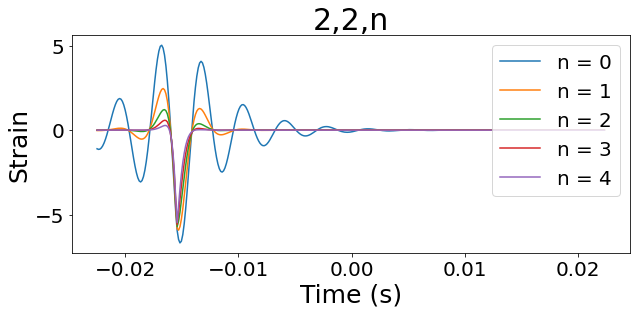

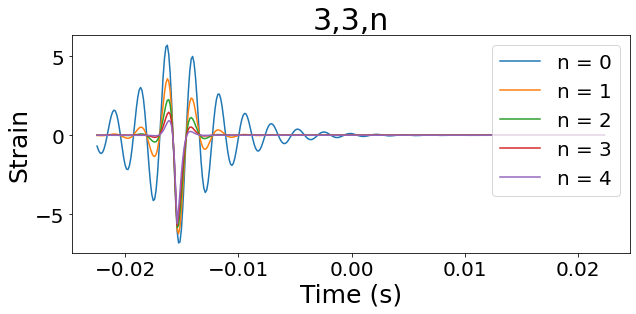

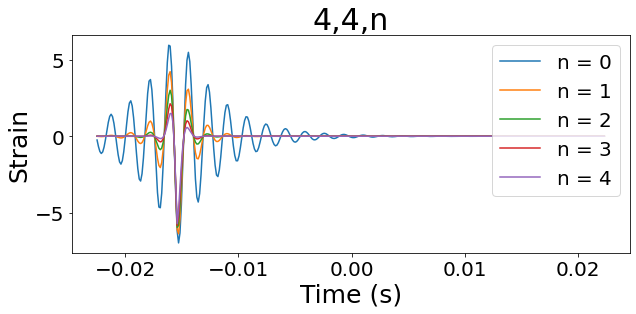

In [37]:
overtone_waveforms_H1(2,2)
plt.title('2,2,n',fontsize=30)
plt.savefig('h122n',bbox_inches='tight')
overtone_waveforms_H1(3,3)
plt.title('3,3,n',fontsize=30)
plt.savefig('h133n',bbox_inches='tight')
overtone_waveforms_H1(4,4)
plt.title('4,4,n',fontsize=30)
plt.savefig('h144n',bbox_inches='tight')